In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('C:/Users/yasmi/Downloads/archive (1)/predictive_maintenance.csv')


In [2]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
# Supprimer les valeurs manquantes
data.dropna(inplace=True)

In [5]:
# Conversion des types de données si nécessaire
data['Target'] = data['Target'].astype(int)

In [6]:
# Encodage des variables catégorielles
data = pd.get_dummies(data, columns=['Type'])

In [7]:
# Standardisation/normalisation des données
scaler = StandardScaler()
numerical_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [8]:
print(data.head())

   UDI Product ID  Air temperature [K]  Process temperature [K]  \
0    1     M14860            -0.952389                -0.947360   
1    2     L47181            -0.902393                -0.879959   
2    3     L47182            -0.952389                -1.014761   
3    4     L47183            -0.902393                -0.947360   
4    5     L47184            -0.902393                -0.879959   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  \
0                0.068185     0.282200        -1.695984       0   No Failure   
1               -0.729472     0.633308        -1.648852       0   No Failure   
2               -0.227450     0.944290        -1.617430       0   No Failure   
3               -0.590021    -0.048845        -1.586009       0   No Failure   
4               -0.729472     0.001313        -1.554588       0   No Failure   

   Type_H  Type_L  Type_M  
0   False   False    True  
1   False    True   False  
2   False    True   False  
3   

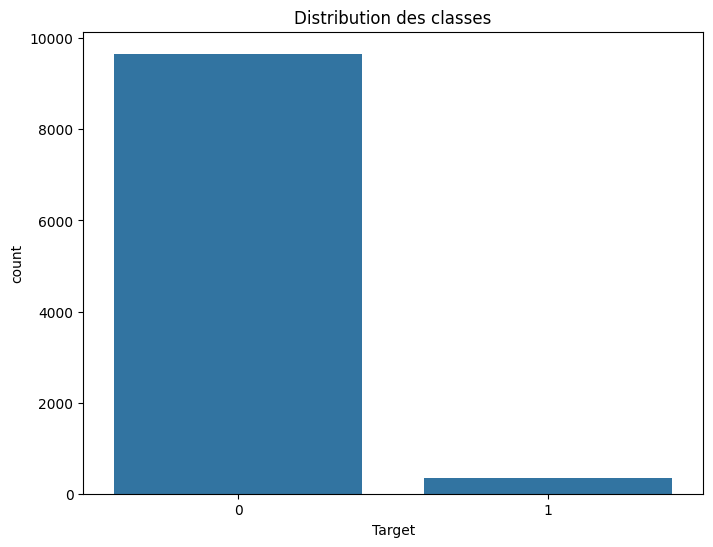

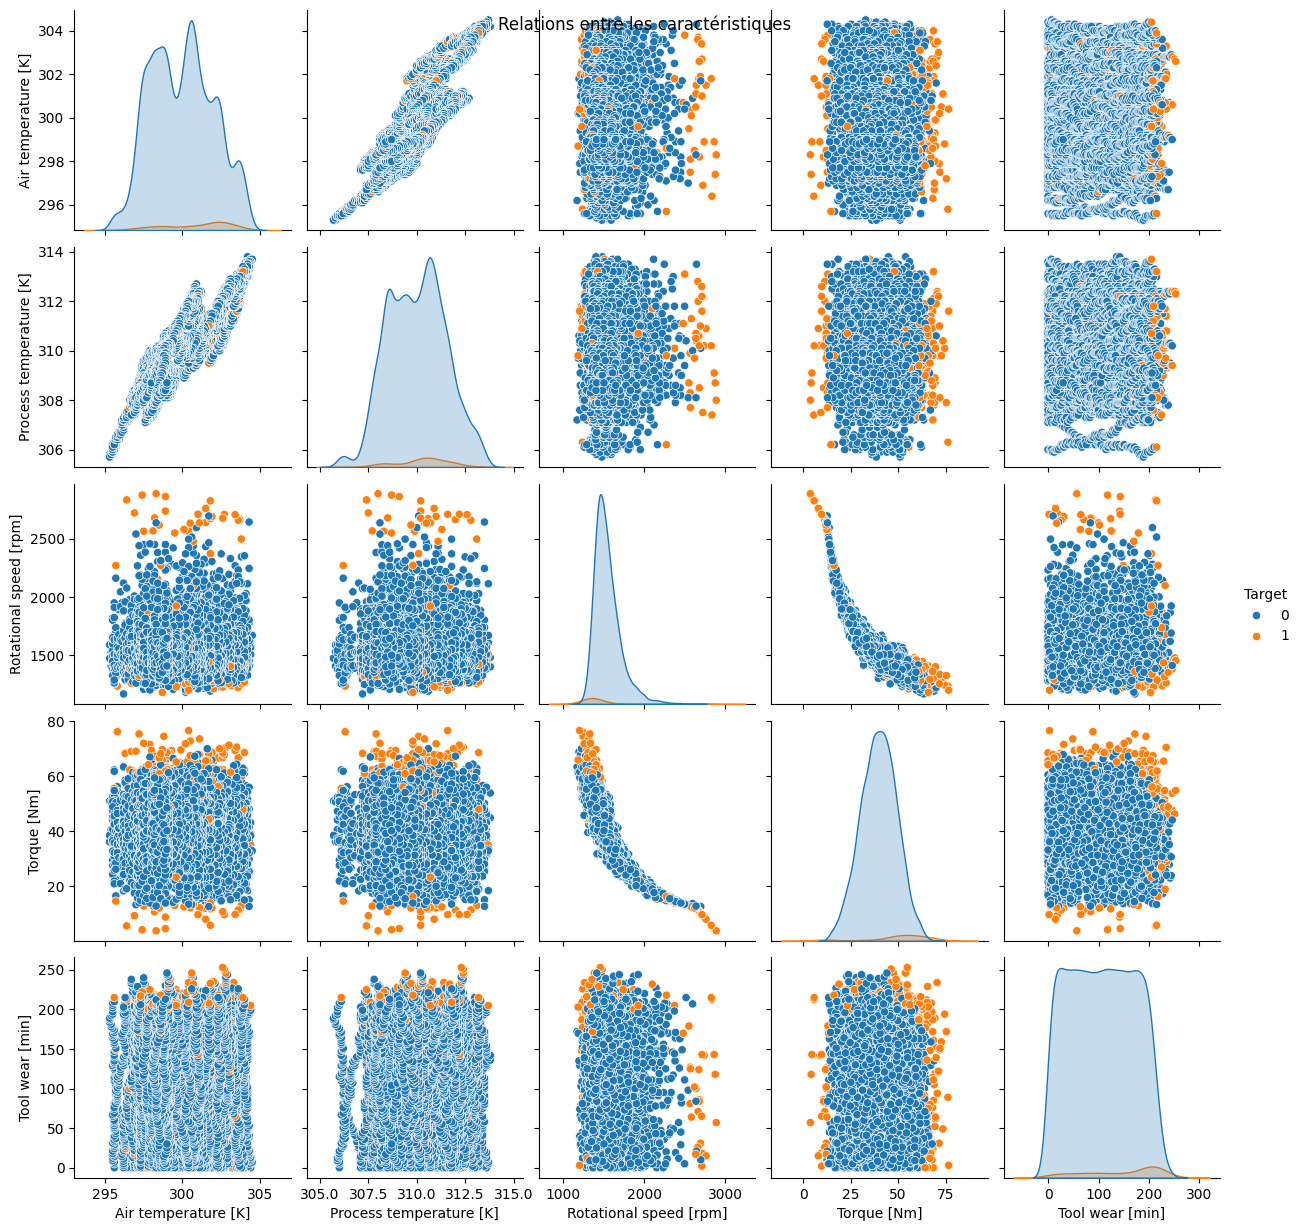

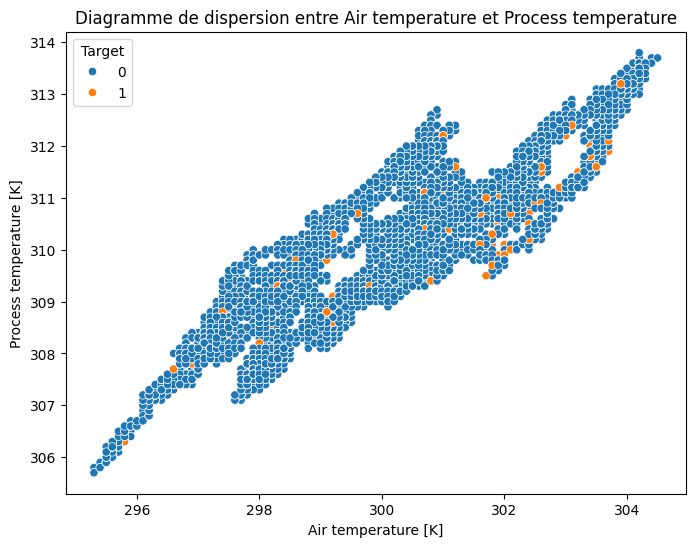

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
data = pd.read_csv('C:/Users/yasmi/Downloads/archive (1)/predictive_maintenance.csv')

# Visualiser la distribution des classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=data)
plt.title('Distribution des classes')
plt.show()

# Représenter graphiquement les relations entre les caractéristiques (par exemple, paireplot pour les caractéristiques numériques)
sns.pairplot(data, hue='Target', vars=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
plt.suptitle('Relations entre les caractéristiques')
plt.show()

# Identifier les tendances et les schémas dans les données
# Utilisez des graphiques appropriés, comme des diagrammes de dispersion, des boîtes à moustaches, des histogrammes, etc.

# Exemple de diagramme de dispersion pour deux caractéristiques
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Air temperature [K]', y='Process temperature [K]', hue='Target', data=data)
plt.title('Diagramme de dispersion entre Air temperature et Process temperature')
plt.show()


In [10]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Charger les données
data = pd.read_csv('C:/Users/yasmi/Downloads/archive (1)/predictive_maintenance.csv')

# Séparer les caractéristiques (X) et la variable cible (y)
X = data.drop('Target', axis=1)
y = data['Target']

# Utiliser RandomOverSampler pour le suréchantillonnage
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Afficher la nouvelle distribution des classes
print(pd.Series(y_resampled).value_counts())


Target
0    9661
1    9661
Name: count, dtype: int64


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleDNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleDNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Spécifiez la taille de l'entrée, de la couche cachée et de la sortie en fonction de votre ensemble de données
input_size = len(data.columns) - 1  # La taille de l'entrée est le nombre de caractéristiques moins la cible
hidden_size = 64
output_size = len(data['Target'].unique())  # Nombre de classes

# Instanciez le modèle
model = SimpleDNN(input_size, hidden_size, output_size)

# Définissez la fonction de perte et l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Vous devrez ajuster le taux d'apprentissage en fonction de votre problème

# Affichez la structure du modèle
print(model)


SimpleDNN(
  (fc1): Linear(in_features=9, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.impute import SimpleImputer

# Charger les données
# Supposons que vous ayez déjà chargé vos données dans 'data'
# data = ...

# Exclure les colonnes 'Product ID', 'Type', 'Failure Type' pour les caractéristiques (X)
columns_to_exclude = ['Product ID', 'Type', 'Failure Type']
X = data.drop(columns_to_exclude + ['Target'], axis=1)

# Convertir les colonnes de type objet en numérique
X_numeric = X.apply(pd.to_numeric, errors='coerce')

# Imputer les valeurs manquantes (remplacer NaN par la médiane)
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X_numeric), columns=X_numeric.columns)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_imputed, data['Target'], test_size=0.2, random_state=42)

# Exemple de modèle PyTorch
class SimpleDNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleDNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Classe enveloppante pour le modèle PyTorch compatible avec scikit-learn
class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001, epochs=10):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.model = SimpleDNN(input_size, hidden_size, output_size)

    def fit(self, X, y):
        # Convertir les données en torch.Tensor
        X_tensor = torch.from_numpy(X.values).float()
        y_tensor = torch.from_numpy(y.values).long()

        # Définir la fonction de perte et l'optimiseur
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)

        # Boucle d'entraînement
        for epoch in range(self.epochs):
            # Forward
            outputs = self.model(X_tensor)
            
            # Calcul de la perte
            loss = criterion(outputs, y_tensor)

            # Backward et optimisation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    def predict(self, X):
        # Convertir les données en torch.Tensor
        X_tensor = torch.from_numpy(X.values).float()

        # Prédiction
        with torch.no_grad():
            outputs = self.model(X_tensor)
            _, predicted = torch.max(outputs, 1)
        
        return predicted.numpy()

    def predict_proba(self, X):
        # Convertir les données en torch.Tensor
        X_tensor = torch.from_numpy(X.values).float()

        # Prédiction des probabilités
        with torch.no_grad():
            outputs = self.model(X_tensor)
        
        return outputs.numpy()

# Définir les hyperparamètres que vous souhaitez optimiser
param_grid = {
    'hidden_size': [32, 64, 128],
    'learning_rate': [0.001, 0.01, 0.1],
    'epochs': [10, 20, 30]
}

# Créer une instance de la classe enveloppante
model = PyTorchClassifier(input_size=X_train.shape[1], hidden_size=64, output_size=len(y_train.unique()))

# Utiliser GridSearchCV avec une fonction de score personnalisée
def custom_scorer(model, X, y):
    y_pred = model.predict(X)
    unique_labels = np.unique(np.concatenate([y, y_pred]))
    return accuracy_score(y, y_pred, labels=unique_labels)

grid_search = GridSearchCV(model, param_grid, cv=3, scoring=make_scorer(custom_scorer))
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)


C:\Users\yasmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\yasmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yasmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yasmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
         

Meilleurs hyperparamètres : {'epochs': 10, 'hidden_size': 32, 'learning_rate': 0.001}


Epoch 1/30, Loss: 0.4845, Test Loss: 0.3438, Train Accuracy: 0.8280, Test Accuracy: 0.9695
Epoch 2/30, Loss: 0.3480, Test Loss: 0.3438, Train Accuracy: 0.9653, Test Accuracy: 0.9695
Epoch 3/30, Loss: 0.3480, Test Loss: 0.3438, Train Accuracy: 0.9653, Test Accuracy: 0.9695
Epoch 4/30, Loss: 0.3480, Test Loss: 0.3438, Train Accuracy: 0.9653, Test Accuracy: 0.9695
Epoch 5/30, Loss: 0.3480, Test Loss: 0.3438, Train Accuracy: 0.9653, Test Accuracy: 0.9695
Epoch 6/30, Loss: 0.3480, Test Loss: 0.3438, Train Accuracy: 0.9653, Test Accuracy: 0.9695
Epoch 7/30, Loss: 0.3480, Test Loss: 0.3438, Train Accuracy: 0.9653, Test Accuracy: 0.9695
Epoch 8/30, Loss: 0.3480, Test Loss: 0.3438, Train Accuracy: 0.9653, Test Accuracy: 0.9695
Epoch 9/30, Loss: 0.3480, Test Loss: 0.3438, Train Accuracy: 0.9653, Test Accuracy: 0.9695
Epoch 10/30, Loss: 0.3480, Test Loss: 0.3438, Train Accuracy: 0.9653, Test Accuracy: 0.9695
Epoch 11/30, Loss: 0.3480, Test Loss: 0.3438, Train Accuracy: 0.9653, Test Accuracy: 0.96

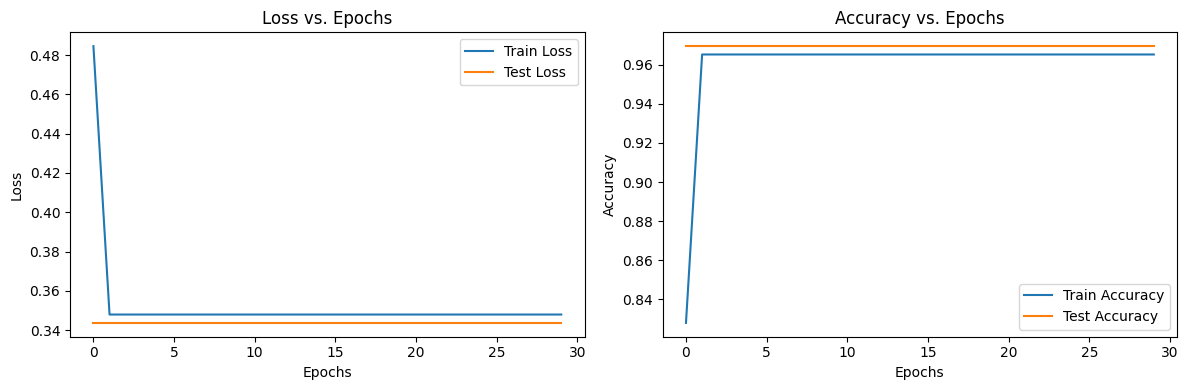

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Charger les données et effectuer le prétraitement
# ... (voir les étapes précédentes)

# Définir le modèle PyTorch
class SimpleDNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleDNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Classe enveloppante pour le modèle PyTorch compatible avec scikit-learn
class PyTorchClassifier:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001, epochs=10):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.model = SimpleDNN(input_size, hidden_size, output_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)
        self.criterion = nn.CrossEntropyLoss()

    def fit(self, X_train, y_train, X_test, y_test):
        X_train_tensor = torch.from_numpy(X_train.values).float()
        y_train_tensor = torch.from_numpy(y_train.values).long()
        X_test_tensor = torch.from_numpy(X_test.values).float()
        y_test_tensor = torch.from_numpy(y_test.values).long()

        train_losses, test_losses = [], []
        train_accuracies, test_accuracies = [], []

        for epoch in range(self.epochs):
            self.model.train()
            self.optimizer.zero_grad()
            outputs = self.model(X_train_tensor)
            loss = self.criterion(outputs, y_train_tensor)
            loss.backward()
            self.optimizer.step()
            train_losses.append(loss.item())

            self.model.eval()
            with torch.no_grad():
                test_outputs = self.model(X_test_tensor)
                test_loss = self.criterion(test_outputs, y_test_tensor)
                test_losses.append(test_loss.item())

                _, train_predicted = torch.max(outputs, 1)
                train_accuracy = accuracy_score(y_train, train_predicted.numpy())
                train_accuracies.append(train_accuracy)

                _, test_predicted = torch.max(test_outputs, 1)
                test_accuracy = accuracy_score(y_test, test_predicted.numpy())
                test_accuracies.append(test_accuracy)

            print(f'Epoch {epoch+1}/{self.epochs}, Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}, '
                  f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

        # Plotting the Loss and Accuracy graphs
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        plt.plot(train_losses, label='Train Loss')
        plt.plot(test_losses, label='Test Loss')
        plt.title('Loss vs. Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(train_accuracies, label='Train Accuracy')
        plt.plot(test_accuracies, label='Test Accuracy')
        plt.title('Accuracy vs. Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instancier et entraîner le modèle avec visualisation des métriques
model = PyTorchClassifier(input_size=X_train.shape[1], hidden_size=64, output_size=len(y_train.unique()), epochs=30)
model.fit(X_train, y_train, X_test, y_test)


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Exemple de modèle PyTorch
class SimpleDNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleDNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Classe enveloppante pour le modèle PyTorch compatible avec scikit-learn
class PyTorchClassifier:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.001, epochs=10):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.model = SimpleDNN(input_size, hidden_size, output_size)

    def fit(self, X, y):
        # Convertir les données en torch.Tensor
        X_tensor = torch.from_numpy(X).float()
        y_tensor = torch.from_numpy(y).long()

        # Définir la fonction de perte et l'optimiseur
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)

        # Boucle d'entraînement
        for epoch in range(self.epochs):
            # Forward
            outputs = self.model(X_tensor)
            
            # Calcul de la perte
            loss = criterion(outputs, y_tensor)

            # Backward et optimisation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    def predict(self, X):
        # Convertir les données en torch.Tensor
        X_tensor = torch.from_numpy(X).float()

        # Prédiction
        with torch.no_grad():
            outputs = self.model(X_tensor)
            _, predicted = torch.max(outputs, 1)
        
        return predicted.numpy()

# Fonction pour calculer les métriques
def calculate_metrics(model, X_train, y_train, X_test, y_test):
    # Prédiction sur les ensembles d'entraînement et de test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

   # Calcul des métriques
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
    test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=1)
    
    train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=1)
    test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=1)
    
    train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=1)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=1)


    # Matrices de confusion
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)

    # Affichage des résultats
    print("Métriques pour l'ensemble d'entraînement:")
    print(f"Exactitude : {train_accuracy:.4f}")
    print(f"Précision : {train_precision:.4f}")
    print(f"Sensibilité : {train_recall:.4f}")
    print(f"Score F1 : {train_f1:.4f}")
    print("Matrice de confusion :\n", train_conf_matrix)

    print("\nMétriques pour l'ensemble de test:")
    print(f"Exactitude : {test_accuracy:.4f}")
    print(f"Précision : {test_precision:.4f}")
    print(f"Sensibilité : {test_recall:.4f}")
    print(f"Score F1 : {test_f1:.4f}")
    print("Matrice de confusion :\n", test_conf_matrix)

# Génération de données de test (remplacez cela par vos propres données)
np.random.seed(42)
X = np.random.rand(100, 10)
y = np.random.choice([0, 1, 2], size=100)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer une instance de la classe enveloppante
model = PyTorchClassifier(input_size=X_train.shape[1], hidden_size=64, output_size=len(np.unique(y)))

# Entraîner le modèle
model.fit(X_train, y_train)

# Appel de la fonction pour calculer les métriques
calculate_metrics(model, X_train, y_train, X_test, y_test)


Métriques pour l'ensemble d'entraînement:
Exactitude : 0.4000
Précision : 0.5965
Sensibilité : 0.4000
Score F1 : 0.2487
Matrice de confusion :
 [[ 0  0 22]
 [ 0  1 25]
 [ 0  1 31]]

Métriques pour l'ensemble de test:
Exactitude : 0.3500
Précision : 0.8194
Sensibilité : 0.3500
Score F1 : 0.2643
Matrice de confusion :
 [[0 0 8]
 [0 2 5]
 [0 0 5]]


In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

class SimpleDNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleDNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

def train_with_metrics(model, X_train, y_train, X_test, y_test, learning_rate, epochs):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        # Convertir les données en torch.Tensor
        X_train_tensor = torch.from_numpy(X_train).float()
        y_train_tensor = torch.from_numpy(y_train).long()

        # Forward
        outputs = model(X_train_tensor)
        
        # Calcul de la perte
        loss = criterion(outputs, y_train_tensor)

        # Backward et optimisation
        loss.backward()
        optimizer.step()

    # Évaluation sur les données de test
    model.eval()

    # Convertir les données de test en torch.Tensor
    X_test_tensor = torch.from_numpy(X_test).float()

    # Prédiction sur les données de test
    with torch.no_grad():
        outputs_test = model(X_test_tensor)
        _, predicted_test = torch.max(outputs_test, 1)

    # Calcul de l'accuracy sur les données de test
    test_accuracy = accuracy_score(y_test, predicted_test.numpy())

    return test_accuracy

# Utilisation du modèle avec régularisation
initial_model = SimpleDNN(input_size, hidden_size, output_size)
train_with_metrics(initial_model, X_train, y_train, X_test, y_test, learning_rate=0.001, epochs=30)

# Récupérer input_size à partir du modèle initial
input_size = X_train.shape[1]

regularized_model = RegularizedPyTorchClassifier(input_size, hidden_size, output_size, dropout_rate=0.5)
regularized_model.fit(X_train, y_train)

# Calcul des métriques pour le modèle avec régularisation
y_train_pred_reg = regularized_model.predict(X_train)
y_test_pred_reg = regularized_model.predict(X_test)

train_accuracy_reg = accuracy_score(y_train, y_train_pred_reg)
test_accuracy_reg = accuracy_score(y_test, y_test_pred_reg)

# Comparez les résultats avec le modèle initial
print("Accuracy without regularization (train):", train_accuracy)
print("Accuracy without regularization (test):", test_accuracy)

print("Accuracy with regularization (train):", train_accuracy_reg)
print("Accuracy with regularization (test):", test_accuracy_reg)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (80x10 and 9x64)

In [45]:
import torch.nn.functional as F

class RegularizedDNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.0, l1_reg=0.0, l2_reg=0.0):
        super(RegularizedDNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)
        
        self.l1_reg = l1_reg
        self.l2_reg = l2_reg

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Créer et entraîner le modèle initial
initial_model = SimpleDNN(input_size, hidden_size, output_size)
train_with_metrics(initial_model, X_train, y_train, X_test, y_test, learning_rate=0.001, epochs=30)

# Appliquer différentes techniques de régularisation
dropout_model = RegularizedDNN(input_size, hidden_size, output_size, dropout_rate=0.5)
l1_model = RegularizedDNN(input_size, hidden_size, output_size, l1_reg=0.01)
l2_model = RegularizedDNN(input_size, hidden_size, output_size, l2_reg=0.01)

# Entraîner les modèles avec régularisation
train_with_metrics(dropout_model, X_train, y_train, X_test, y_test, learning_rate=0.001, epochs=30)
train_with_metrics(l1_model, X_train, y_train, X_test, y_test, learning_rate=0.001, epochs=30)
train_with_metrics(l2_model, X_train, y_train, X_test, y_test, learning_rate=0.001, epochs=30)



RuntimeError: mat1 and mat2 shapes cannot be multiplied (80x10 and 9x64)